In [2]:
import numpy as np
import os
CurrentPath = os.getcwd()
data_2 = np.loadtxt(CurrentPath + '/2025/data_2.txt', delimiter=' ')
X = data_2.T[0];Y = data_2.T[1]; var = data_2.T[2]

In [43]:
import nestle

#define loglikelihood
def loglike_linear(theta):
    model = linear(X,theta) # Change the model here
    loglikelihood = -0.5*np.sum((Y-model)**2/var)
    return(loglikelihood)

#define models
def linear(x, theta):
    y= theta[0]*x + theta[1]
    return y
def cube(x,theta):
    y = theta[0]*x**3 + theta[1]*x**2 + theta[2]*x + theta[3]
    return y
def quadratic(x,theta):
    y = theta[0]*x**2 + theta[1]*x + theta[2]
    return y
def exponential(x,theta):
    y = theta[0]*np.exp(theta[1]*x) + theta[2]
    return y
def powerlaw(x,theta):
    y = theta[0]*x**theta[1] + theta[2]
    return y
#define prior
def prior(x):
    theta = 100 * x - 50
    return theta

### linear function

niter: 3975
ncall: 7050
nsamples: 4975
logz: -33.896 +/-  0.046
h:  2.153 
logzerr: 0.04640314915114195
Best-fit parameters: a = 13.098 +/- 0.395
Best-fit parameters: b = 2.698 +/- 0.213


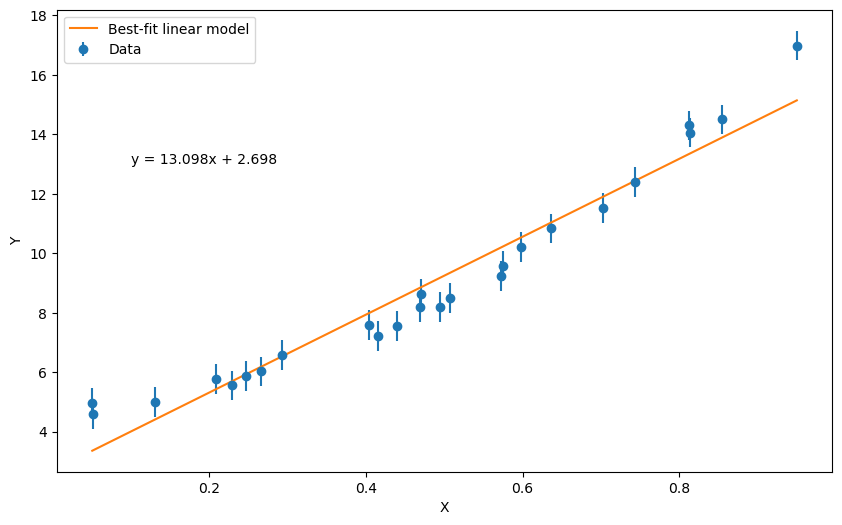

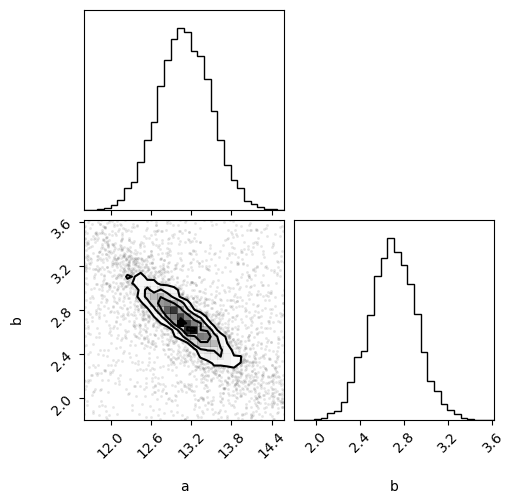

In [83]:
import matplotlib.pyplot as plt
import corner

def prior(x):
    theta = np.array([3,2]) * x + np.array([13.091-1.5,2.7-1])
    return theta
result_linear = nestle.sample(loglike_linear, prior, 2,npoints=1000, method='single')
print(result_linear.summary(), f"\nlogzerr: {result_linear.logzerr}")
p_linear, cov_linear = nestle.mean_and_cov(result_linear.samples, result_linear.weights)
print(f"Best-fit parameters: a = {p_linear[0]:.3f} +/- {np.sqrt(cov_linear[0,0]):.3f}")
print(f"Best-fit parameters: b = {p_linear[1]:.3f} +/- {np.sqrt(cov_linear[1,1]):.3f}")

plt.figure(figsize=(10, 6))
plt.errorbar(X, Y, np.sqrt(var), fmt='o', label='Data')
plt.plot(X, linear(X, p_linear), label='Best-fit linear model')
plt.text(0.1,13, f"y = {p_linear[0]:.3f}x + {p_linear[1]:.3f}")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
fig = corner.corner(result_linear.samples,weights=result_linear.weights, labels=['a', 'b'],
                    range=[0.99999, 0.99999], bins=30)
plt.show()

### quadratic func

niter: 5437
ncall: 9768
nsamples: 6437
logz: -7.278 +/-  0.057
h:  3.216 
logzerr: 0.05671269006335142
Best-fit parameters: 11.571 +/- 1.456
Best-fit parameters: 1.947 +/- 1.447
Best-fit parameters: 4.674 +/- 0.324


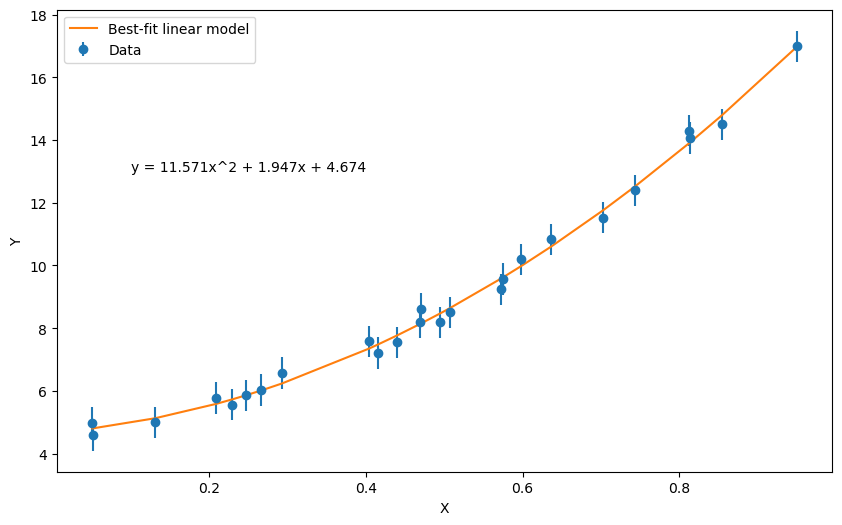

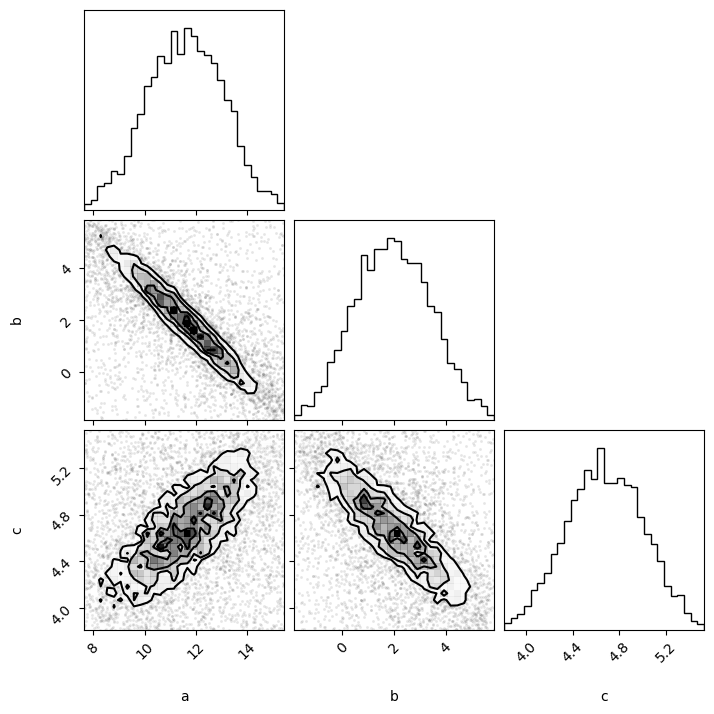

In [92]:
#define prior
def prior(x):
    theta = np.array([7.81,7.81,1.715]) * x + np.array([11.533-3.9,1.989-3.9,4.666-0.8575])
    return theta

def loglike_quadratic(theta):
    model = quadratic(X,theta) # Change the model here
    loglikelihood = -0.5*np.sum((Y-model)**2/var)
    return(loglikelihood)

result_quadratic = nestle.sample(loglike_quadratic, prior, 3,npoints=1000, method='single')
print(result_quadratic.summary(), f"\nlogzerr: {result_quadratic.logzerr}")
p_quadratic, cov_quadratic = nestle.mean_and_cov(result_quadratic.samples, result_quadratic.weights)
print(f"Best-fit parameters: {p_quadratic[0]:.3f} +/- {np.sqrt(cov_quadratic[0,0]):.3f}")
print(f"Best-fit parameters: {p_quadratic[1]:.3f} +/- {np.sqrt(cov_quadratic[1,1]):.3f}")
print(f"Best-fit parameters: {p_quadratic[2]:.3f} +/- {np.sqrt(cov_quadratic[2,2]):.3f}")

plt.figure(figsize=(10, 6))
plt.errorbar(X, Y, np.sqrt(var), fmt='o', label='Data')
plt.plot(X, quadratic(X, p_quadratic), label='Best-fit linear model')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(0.1,13, f"y = {p_quadratic[0]:.3f}x^2 + {p_quadratic[1]:.3f}x + {p_quadratic[2]:.3f}")
plt.legend()
fig = corner.corner(result_quadratic.samples,weights=result_quadratic.weights, labels=['a', 'b','c'],
                    range=[0.99999, 0.99999,0.99999], bins=30)
plt.show()

### cubic function

In [86]:
# example prior to compare quad vs cube

#define prior
def prior(x):
    theta = np.array([31.845,47.04,19.995,2.39]) * x + np.array([1.083-15.9225,9.96-23.52,2.617-9.9975,4.608-1.195])
    return theta

niter: 9080
ncall: 17656
nsamples: 10080
logz: -11.000 +/-  0.080
h:  6.472 
logzerr: 0.08044884089176471
Best-fit parameters: 1.203 +/- 6.042
Best-fit parameters: 9.766 +/- 8.878
Best-fit parameters: 2.693 +/- 3.745
Best-fit parameters: 4.604 +/- 0.446


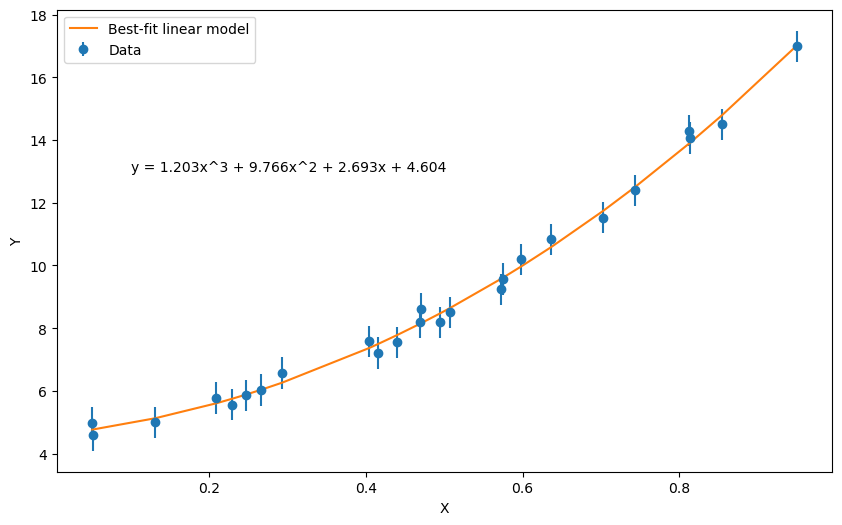

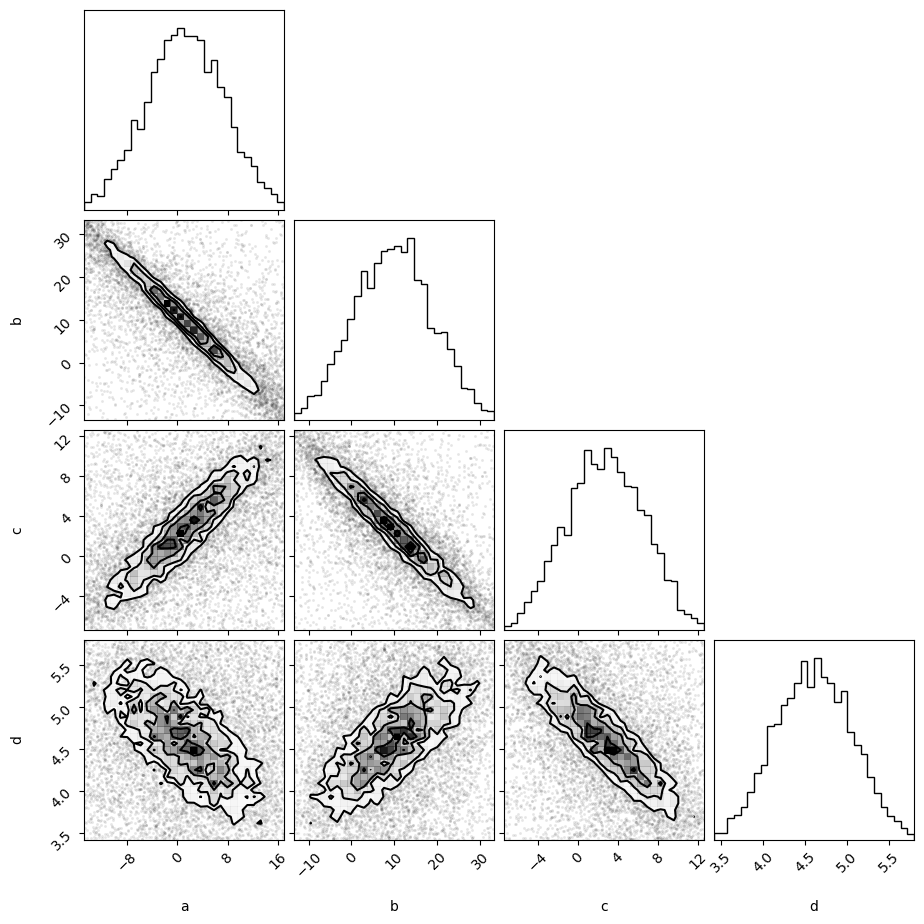

In [87]:
def loglike_cube(theta):
    model = cube(X,theta) # Change the model here
    loglikelihood = -0.5*np.sum((Y-model)**2/var)
    return(loglikelihood)

result_cube = nestle.sample(loglike_cube, prior, 4,npoints=1000, method='single')
print(result_cube.summary(), f"\nlogzerr: {result_cube.logzerr}")
p_cube, cov_cube = nestle.mean_and_cov(result_cube.samples, result_cube.weights)
print(f"Best-fit parameters: {p_cube[0]:.3f} +/- {np.sqrt(cov_cube[0,0]):.3f}")
print(f"Best-fit parameters: {p_cube[1]:.3f} +/- {np.sqrt(cov_cube[1,1]):.3f}")
print(f"Best-fit parameters: {p_cube[2]:.3f} +/- {np.sqrt(cov_cube[2,2]):.3f}")
print(f"Best-fit parameters: {p_cube[3]:.3f} +/- {np.sqrt(cov_cube[3,3]):.3f}")



plt.figure(figsize=(10, 6))
plt.errorbar(X, Y, np.sqrt(var), fmt='o', label='Data')
plt.plot(X, cube(X, p_cube), label='Best-fit linear model')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(0.1,13, f"y = {p_cube[0]:.3f}x^3 + {p_cube[1]:.3f}x^2 + {p_cube[2]:.3f}x + {p_cube[3]:.3f}")
plt.legend()

fig = corner.corner(result_cube.samples,weights=result_cube.weights, labels=['a', 'b','c','d'],
                    range=[0.99999, 0.99999,0.99999,0.99999], bins=30)
plt.show()

### exponential function

In [95]:
#define prior
def prior(x):
    theta = np.array([5.35,1.215,6.515]) * x + np.array([3.52-2.675,1.661-0.6075,0.734-3.2575])
    return theta

niter: 8006
ncall: 63385
nsamples: 9006
logz: -10.207 +/-  0.076
h:  5.748 
logzerr: 0.07581778496489255
Best-fit parameters: 3.458 +/- 0.910
Best-fit parameters: 1.668 +/- 0.221
Best-fit parameters: 0.803 +/- 1.129


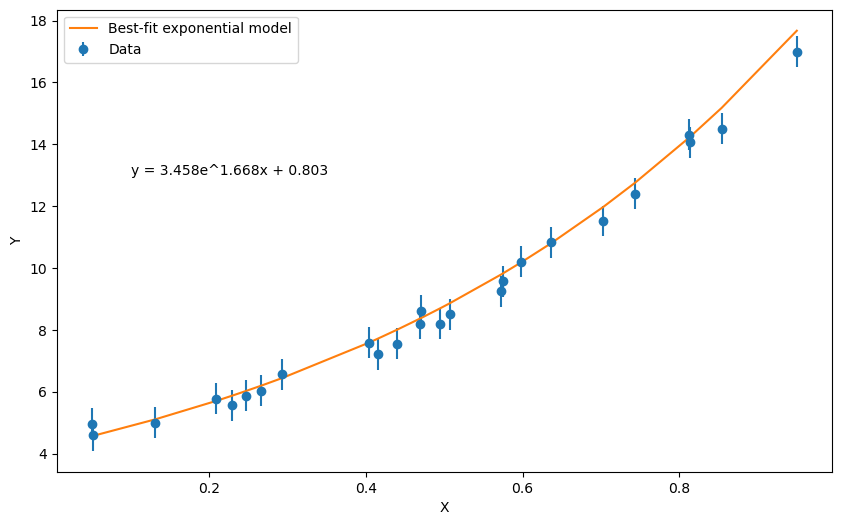

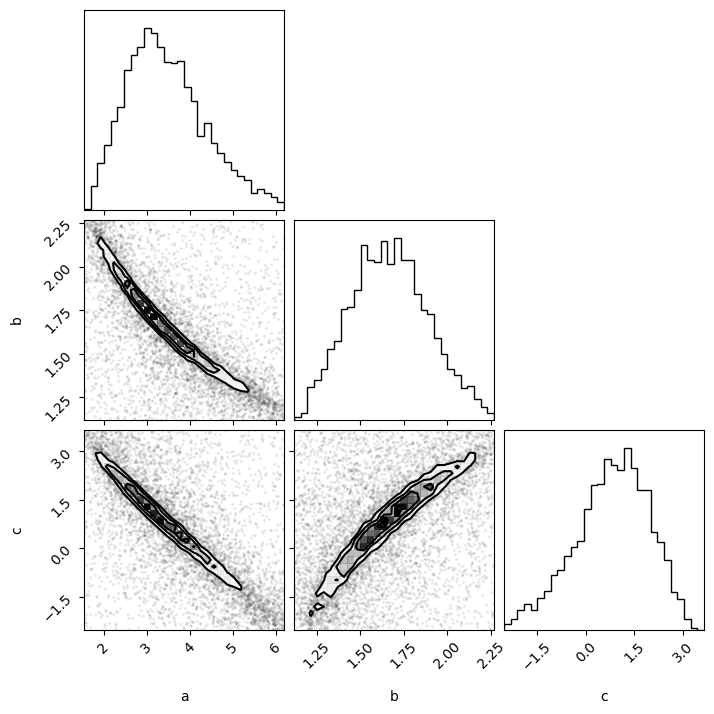

In [100]:
def loglike_exponential(theta):
    model = exponential(X,theta) # Change the model here
    loglikelihood = -0.5*np.sum((Y-model)**2/var)
    return(loglikelihood)

result_exponential = nestle.sample(loglike_exponential, prior, 3,npoints=1000, method='single')
print(result_exponential.summary(), f"\nlogzerr: {result_exponential.logzerr}")
p_exponential, cov_exponential = nestle.mean_and_cov(result_exponential.samples, result_exponential.weights)
print(f"Best-fit parameters: {p_exponential[0]:.3f} +/- {np.sqrt(cov_exponential[0,0]):.3f}")
print(f"Best-fit parameters: {p_exponential[1]:.3f} +/- {np.sqrt(cov_exponential[1,1]):.3f}")
print(f"Best-fit parameters: {p_exponential[2]:.3f} +/- {np.sqrt(cov_exponential[2,2]):.3f}")



plt.figure(figsize=(10, 6))
plt.errorbar(X, Y, np.sqrt(var), fmt='o', label='Data')
plt.plot(X, exponential(X, p_exponential), label='Best-fit exponential model')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(0.1,13, f"y = {p_exponential[0]:.3f}e^{p_exponential[1]:.3f}x + {p_exponential[2]:.3f}")
plt.legend()

fig = corner.corner(result_exponential.samples,weights=result_exponential.weights, labels=['a', 'b','c'],
                    range=[0.99999, 0.99999,0.99999], bins=30)
plt.show()


### Power law

niter: 3971
ncall: 7492
nsamples: 4971
logz: -5.899 +/-  0.042
h:  1.767 
logzerr: 0.042040869722507174
Best-fit parameters: 13.330 +/- 0.403
Best-fit parameters: 1.845 +/- 0.127
Best-fit parameters: 4.814 +/- 0.256


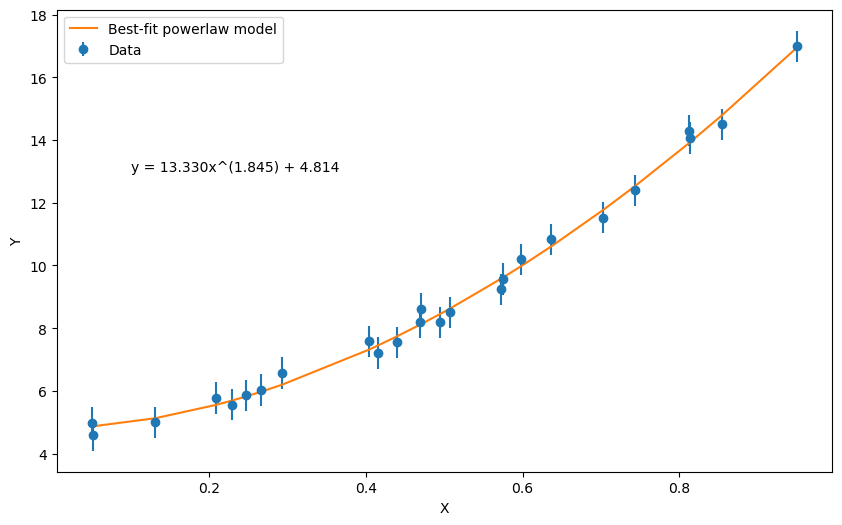

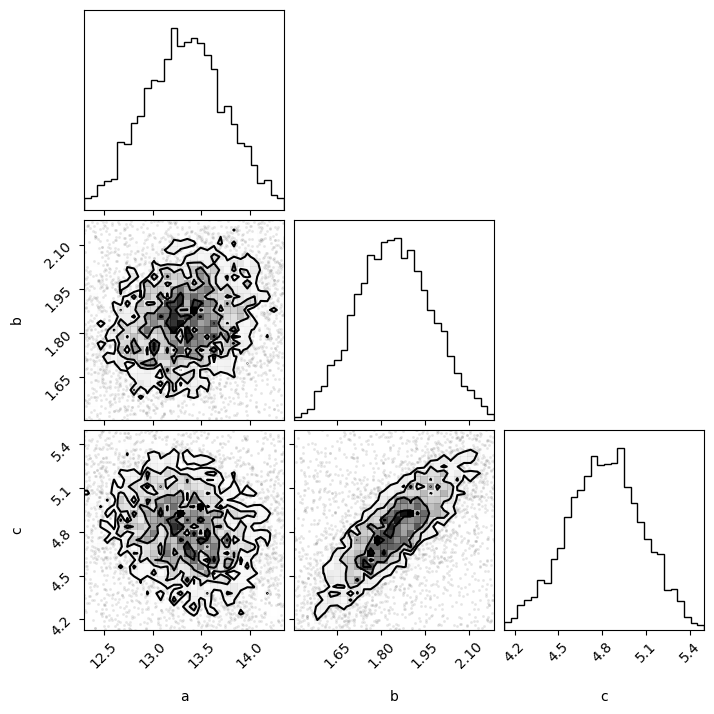

In [90]:
#define prior
def prior(x):
    theta = np.array([2.06,0.685,1.37]) * x + np.array([13.323-1.03,1.844-0.3425,4.812-0.685])
    return theta

def loglike_powerlaw(theta):
    model = powerlaw(X,theta) # Change the model here
    loglikelihood = -0.5*np.sum((Y-model)**2/var)
    return(loglikelihood)

result_powerlaw = nestle.sample(loglike_powerlaw, prior, 3,npoints=1000, method='single')
print(result_powerlaw.summary(), f"\nlogzerr: {result_powerlaw.logzerr}")
p_powerlaw, cov_powerlaw = nestle.mean_and_cov(result_powerlaw.samples, result_powerlaw.weights)
print(f"Best-fit parameters: {p_powerlaw[0]:.3f} +/- {np.sqrt(cov_powerlaw[0,0]):.3f}")
print(f"Best-fit parameters: {p_powerlaw[1]:.3f} +/- {np.sqrt(cov_powerlaw[1,1]):.3f}")
print(f"Best-fit parameters: {p_powerlaw[2]:.3f} +/- {np.sqrt(cov_powerlaw[2,2]):.3f}")


plt.figure(figsize=(10, 6))
plt.errorbar(X, Y, np.sqrt(var), fmt='o', label='Data')
plt.plot(X, powerlaw(X, p_powerlaw), label='Best-fit powerlaw model')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(0.1,13, f"y = {p_powerlaw[0]:.3f}x^({p_powerlaw[1]:.3f}) + {p_powerlaw[2]:.3f}")
plt.legend()

fig = corner.corner(result_powerlaw.samples,weights=result_powerlaw.weights, labels=['a', 'b','c'],
                    range=[0.99999, 0.99999,0.99999], bins=30)
plt.show()
